In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [20]:
def show_sample(index):
    plt.figure(figsize = (8,2))
    plt.imshow(X_train[index])

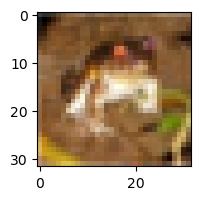

In [21]:
show_sample(0)

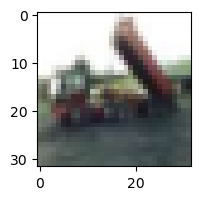

In [22]:
show_sample(2)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train = y_train.reshape(-1,)

In [13]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [15]:
def plot_sample(X, y, index):
    plt.figure(figsize = (8,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

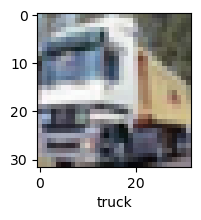

In [19]:
plot_sample(X_train, y_train, 1)

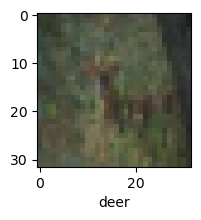

In [23]:
plot_sample(X_train, y_train, 10)

Standardization

In [24]:
X_train = X_train/255
X_test = X_test/255

In [25]:
ann_model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann_model.compile(optimizer='SGD',
                 loss = 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])

ann_model.fit(X_train, y_train, epochs=10)

Metal device set to: Apple M1


2022-12-08 12:48:09.644343: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-08 12:48:09.644772: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2022-12-08 12:48:10.983476: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-08 12:48:11.165355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 20s 13ms/step - loss: 1.8147 - accuracy: 0.3559
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6258 - accuracy: 0.4264
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5449 - accuracy: 0.4572
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4818 - accuracy: 0.4767
Epoch 5/10
1563/1563 [==============================] - 20s 12ms/step - loss: 1.4335 - accuracy: 0.4946
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3925 - accuracy: 0.5093
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3528 - accuracy: 0.5257
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3190 - accuracy: 0.5363
Epoch 9/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2842 - accuracy: 0.5509
Epoch 10/10
1563/1563 [==============================] - 19s 12ms/step - lo

In [26]:
ann_model.evaluate(X_test, y_test)

 16/313 [>.............................] - ETA: 2s - loss: 1.4209 - accuracy: 0.5098

2022-12-08 12:51:31.229539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 1.3991 - accuracy: 0.5017


[1.3990740776062012, 0.5017000436782837]

CLASSIFICATION REPORT

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann_model.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_class))

 31/313 [=>............................] - ETA: 1s

2022-12-08 12:54:57.248651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.70      0.58      1000
           1       0.60      0.69      0.64      1000
           2       0.39      0.41      0.40      1000
           3       0.43      0.20      0.27      1000
           4       0.63      0.20      0.30      1000
           5       0.42      0.47      0.44      1000
           6       0.40      0.80      0.53      1000
           7       0.72      0.45      0.55      1000
           8       0.82      0.44      0.57      1000
           9       0.50      0.65      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.54      0.50      0.49     10000
weighted avg       0.54      0.50      0.49     10000



ANN is not performing well in this case. The accuracy is very low and we did heavy computations as well.

Difference between sigmoid and softmax:

Sigmoid gives the probability of a data point belonging to each class in a multi class classification. The data point belongs to that class which has the highest probability.

Softmax normalizes the probability of every class such that sum of all probabilities become equal to 1 in a multi class classification.

In [47]:
cnn_model = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])

cnn_model.fit(X_train, y_train, epochs=10)

Epoch 1/10


2022-12-08 13:11:19.225698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 20s 12ms/step - loss: 1.3414 - accuracy: 0.5184
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9588 - accuracy: 0.6621
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7729 - accuracy: 0.7310
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6014 - accuracy: 0.7908
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.4349 - accuracy: 0.8502
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2886 - accuracy: 0.9007
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.1856 - accuracy: 0.9365
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.1315 - accuracy: 0.9548
Epoch 9/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0994 - accuracy: 0.9668
Epoch 10/10
1563/1563 [==============================] - 19s 12ms/step - lo

In [49]:
cnn_model.evaluate(X_test, y_test)

 18/313 [>.............................] - ETA: 1s - loss: 1.5248 - accuracy: 0.7101

2022-12-08 13:14:46.069767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 1.6554 - accuracy: 0.7042


[1.6553975343704224, 0.704200029373169]

In [50]:
y_test = y_test.reshape(-1,)

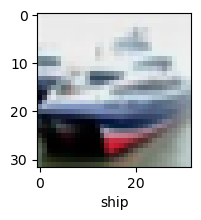

In [51]:
plot_sample(X_test, y_test, 1)

In [52]:
y_pred = cnn_model.predict(X_test)

 38/313 [==>...........................] - ETA: 1s

2022-12-08 13:15:39.215426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step


In [53]:
y_pred[:5]

array([[1.7518029e-04, 6.2586844e-04, 3.1026106e-05, 3.9732000e-01,
        6.7247383e-06, 6.0177749e-01, 2.6750306e-05, 4.6723324e-07,
        3.6177909e-05, 4.0239505e-07],
       [2.8489049e-07, 2.4656293e-03, 5.2224026e-14, 7.7635991e-15,
        3.2045424e-17, 1.3768398e-17, 3.0803420e-16, 7.7092800e-20,
        9.9753386e-01, 3.3208337e-07],
       [1.6540682e-02, 1.2307124e-03, 4.0013963e-04, 7.2666335e-05,
        1.2860259e-03, 1.1043408e-03, 2.4346884e-06, 1.3089020e-04,
        9.2903465e-01, 5.0197400e-02],
       [9.9999976e-01, 1.9535742e-08, 4.5287099e-08, 3.4546923e-09,
        1.0305136e-08, 5.8531217e-14, 1.4335770e-12, 3.3704817e-11,
        2.7820360e-07, 1.3270132e-13],
       [9.7862104e-15, 8.7207255e-09, 1.0591372e-04, 6.6056160e-08,
        9.9957627e-01, 7.6696302e-11, 3.1770347e-04, 4.5536546e-15,
        4.7590106e-13, 9.9357924e-13]], dtype=float32)

In [54]:
y_classes = [np.argmax(element) for element in y_pred]

In [55]:
y_classes[:5]

[5, 8, 8, 0, 4]

In [56]:
classes[y_classes[3]]

'airplane'

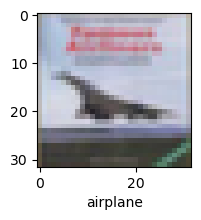

In [57]:
plot_sample(X_test, y_test, 3)

In [58]:
classes[y_classes[2]]

'ship'

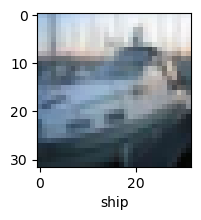

In [59]:
plot_sample(X_test, y_test, 2)

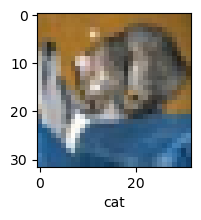

In [61]:
plot_sample(X_test, y_test, 0)

In [62]:
classes[y_classes[0]]

'dog'

HERE IT PREDICTED WRONG

CLASSIFICATION REPORT

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = cnn_model.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_class))

313/313 [==============================] - 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      1000
           1       0.78      0.84      0.81      1000
           2       0.65      0.60      0.63      1000
           3       0.55      0.46      0.50      1000
           4       0.60      0.69      0.64      1000
           5       0.60      0.58      0.59      1000
           6       0.74      0.80      0.77      1000
           7       0.73      0.74      0.74      1000
           8       0.83      0.80      0.81      1000
           9       0.81      0.74      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



MUCH BETTER

# WHAT WE DO IN CNN

# CONVOLUTION

1. Connections sparsity reduces overfitting. Every node is not connected to the other node like dense network. We run filter here.


2. Conv + Pooling gives location invariant feature detection


3. Parameter Sharing. Parameters are transferred to learn different features.

# ReLU

1. Introduces Non-Linearity


2. Speeds up training. Faster to compute.

# Pooling

1. Reduces dimensions and computation


2. Reduces Overfitting


3. Makes the model tolerant towards small distortions and variations.

## FEATURE EXTRACTION

Convolution + ReLU ----> Pooling -----> Convolution + ReLU ----> Pooling

## CLASSIFICATION

Flatten -----> AGGREGATION

For Rotation and scale(thickness and thinness) training, we can perform Data Augmentation.

## HYPERPARAMS IN CNN:

1. Number of Filters

2. Dimension of each filter

3. padding

4. strides

## CNN FLOW

Edge -----> Pattern -----> Parts of Object ------> Object ------> Image -------> Scene

Filters we can write by ourselves

Beauty of CNN is it can learn filters by itself and also improve accordingly.

PADDING

Valid Convolution : No Padding

Same Convolution : Pad Such that output is same as input

STRIDE: SKIP

## DATA AUGMENTATION

OVERCOMING THE ROTATION AND THICKNESS ISSUES IN IMAGE TRAINING

GENERATING NEW SAMPLES FROM THE ORIGINAL SAMPLE

PIL: Image Library in Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [68]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
from pathlib import Path
data_dir = Path(data_dir)

In [5]:
data_dir

PosixPath('datasets/flower_photos')

`glob` will retrieve all the images with jpg format

In [6]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/18599603859_f2ec616ddf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg')

In [7]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [8]:
roses = list(data_dir.glob('roses/*'))

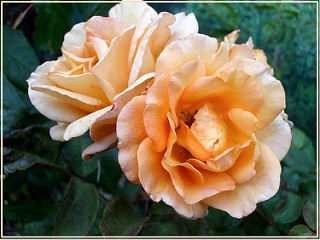

In [9]:
PIL.Image.open(str(roses[2]))

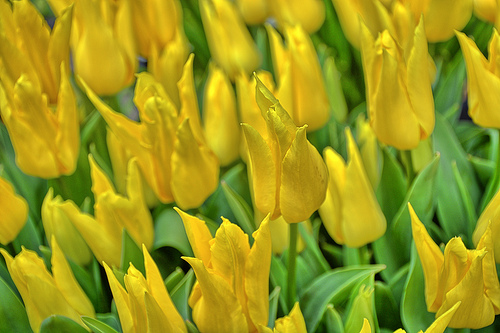

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[7]))

CREATING DICTIONARY OF ALL FLOWERS WITH THEIR FILE PATHS 

In [11]:
flower_image_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [12]:
flower_image_dict['roses']

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/18599603859_f2ec616ddf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg')

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img

array([[[ 14,   3,   0],
        [  1,   0,   2],
        [  0,   0,   6],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       [[  0,   0,   9],
        [  0,   0,   4],
        [  4,   7,   5],
        ...,
        [243, 244, 242],
        [243, 244, 242],
        [243, 244, 242]],

       [[  3,  57, 164],
        [ 30,  63, 132],
        [  0,   0,  19],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       ...,

       [[140, 105,  85],
        [146, 112,  89],
        [147, 113,  90],
        ...,
        [155, 125,  96],
        [152, 122,  93],
        [148, 118,  89]],

       [[148, 114,  91],
        [152, 118,  95],
        [150, 116,  93],
        ...,
        [154, 124,  95],
        [152, 122,  93],
        [150, 120,  93]],

       [[153, 119,  96],
        [154, 120,  97],
        [149, 115,  91],
        ...,
        [151, 122,  95],
        [153, 123,  94],
        [151, 121,  94]]

In [15]:
img.shape

(243, 500, 3)

DATASETS ARE OF DIFFERENT SHAPES. WE NEED TO RESIZE THEM. ML WILL PERFORM WELL IN THAT CASE.

In [16]:
X, y = [], []

for flower_name, images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
X

array([[[[  2,   0,   2],
         [ 10,   5,   1],
         [ 89,  85,  97],
         ...,
         [244, 245, 243],
         [244, 245, 243],
         [244, 245, 243]],

        [[ 14,  33,  73],
         [  6,   1,   2],
         [ 92,  90, 105],
         ...,
         [243, 244, 242],
         [244, 245, 243],
         [243, 244, 242]],

        [[122, 176, 224],
         [ 10,   1,   2],
         [ 72,  80,  84],
         ...,
         [244, 245, 243],
         [244, 245, 243],
         [244, 245, 243]],

        ...,

        [[147, 109,  85],
         [145, 109,  85],
         [144, 108,  84],
         ...,
         [155, 122,  96],
         [152, 121,  95],
         [149, 118,  93]],

        [[148, 114,  91],
         [154, 120,  96],
         [146, 112,  88],
         ...,
         [155, 125,  98],
         [153, 121,  95],
         [152, 122,  93]],

        [[153, 119,  96],
         [151, 117,  93],
         [152, 117,  94],
         ...,
         [154, 124,  97],
        

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [20]:
len(X_train)

2936

In [21]:
len(X_test)

734

STANDARD SCALING THE DATASETS

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

MODEL TRAINING

In [23]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(len(flowers_labels_dict.keys()))
])

Metal device set to: Apple M1


2022-12-09 10:06:59.278581: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-09 10:06:59.280965: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


WE ARE NOT USING ANY ACTIVATION FUNCTION HERE. HERE LINEAR ACTIVATION IS APPLIED IN LAST LAYER

In [24]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10


2022-12-09 10:07:10.534918: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-09 10:07:11.075141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


92/92 [==============================] - 6s 62ms/step - loss: 1.3596 - accuracy: 0.4128
Epoch 2/10
92/92 [==============================] - 6s 61ms/step - loss: 1.0479 - accuracy: 0.5821
Epoch 3/10
92/92 [==============================] - 5s 59ms/step - loss: 0.8919 - accuracy: 0.6594
Epoch 4/10
92/92 [==============================] - 6s 60ms/step - loss: 0.6889 - accuracy: 0.7425
Epoch 5/10
92/92 [==============================] - 5s 59ms/step - loss: 0.5202 - accuracy: 0.8028
Epoch 6/10
92/92 [==============================] - 6s 60ms/step - loss: 0.2854 - accuracy: 0.9057
Epoch 7/10
92/92 [==============================] - 6s 60ms/step - loss: 0.1731 - accuracy: 0.9445
Epoch 8/10
92/92 [==============================] - 5s 59ms/step - loss: 0.1049 - accuracy: 0.9717
Epoch 9/10
92/92 [==============================] - 5s 60ms/step - loss: 0.1101 - accuracy: 0.9629
Epoch 10/10
92/92 [==============================] - 5s 59ms/step - loss: 0.0322 - accuracy: 0.9942


In [25]:
model.evaluate(X_test_scaled, y_test)

 3/23 [==>...........................] - ETA: 0s - loss: 1.9923 - accuracy: 0.6354

2022-12-09 10:08:11.125771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 1s 23ms/step - loss: 1.9568 - accuracy: 0.6471


[1.9568283557891846, 0.6471389532089233]

THE MODEL IS AN OVER FITTED MODEL AS WE GET HIGH TRAINING SCORE BUT A VERY LOW TESTING SCORE

In [26]:
pred = model.predict(X_test_scaled)
pred

 5/23 [=====>........................] - ETA: 0s

2022-12-09 10:08:18.276208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 1s 24ms/step


array([[-3.8665633 , -4.985933  ,  7.1236796 ,  0.9370439 , -3.155173  ],
       [-4.5236993 , -7.589521  , -2.5187979 , 12.583719  , -0.40683386],
       [-2.4877598 , -5.13271   ,  2.6754942 ,  8.325045  , -0.4356905 ],
       ...,
       [-2.085423  ,  6.068753  ,  1.4724268 , -1.9047631 , -4.995176  ],
       [-7.1832356 , -5.920607  , 15.576041  ,  8.771605  ,  4.7235203 ],
       [-0.58594626, -7.7610383 , 10.61202   ,  8.300776  ,  3.657307  ]],
      dtype=float32)

LINEAR OUTPUT IS OBTAINED

TENSORFLOW HAS SOFTMAX BUILT IN WHICH NORMALIZES THE MATRIX

In [27]:
score = tf.nn.softmax(pred[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.6829888e-05, 5.4947145e-06, 9.9789101e-01, 2.0523958e-03,
       3.4279477e-05], dtype=float32)>

In [28]:
np.argmax(score)

2

In [29]:
y_test[0]

0

RESULTS ARE NOT MATCHING. 

WE WILL PERFORM DATA AUGMENTATION.

In [30]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3)
])

In [ ]:
plt.axis('off')
plt.imshow(X[2])